c:\Users\adipk\myapps\software\envs\alphazero\lib\site-packages\ipykernel_launcher.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Top 10 most important features:
B_avg_CTRL_time(seconds): 0.3433
B_avg_opp_CTRL_time(seconds): 0.2908
R_avg_CTRL_time(seconds): 0.2724
B_avg_TOTAL_STR_att: 0.2647
B_avg_opp_TOTAL_STR_att: 0.2438
R_avg_TOTAL_STR_att: 0.2144
B_avg_SIG_STR_att: 0.2120
B_avg_opp_SIG_STR_att: 0.2005
R_avg_opp_TOTAL_STR_att: 0.1958
R_avg_opp_CTRL_time(seconds): 0.1918
R_avg_SIG_STR_att: 0.1769
B_avg_DISTANCE_att: 0.1748
B_avg_opp_DISTANCE_att: 0.1700
B_avg_HEAD_att: 0.1679
R_avg_opp_SIG_STR_att: 0.1678
B_avg_opp_HEAD_att: 0.1577
R_avg_DISTANCE_att: 0.1495
R_avg_opp_DISTANCE_att: 0.1455
R_avg_HEAD_att: 0.1396
B_avg_TOTAL_STR_landed: 0.1377
R_avg_opp_HEAD_att: 0.1328
B_Reach_cms: 0.1284
B_avg_opp_TOTAL_STR_landed: 0.1207
R_avg_TOTAL_STR_landed: 0.1088
R_avg_opp_TOTAL_STR_landed: 0.0926
B_avg_SIG_STR_landed: 0.0913
B_avg_opp_SIG_STR_landed: 0.0826
R_avg_SIG_STR_landed: 0.0759
R_avg_opp_SIG_STR_landed: 0.0679
R_Reach_cms: 0.0677
B_avg_DISTANCE_landed: 0.0657
B_avg_opp_DISTANCE_landed: 0.0618
B_avg_HEAD_landed: 0

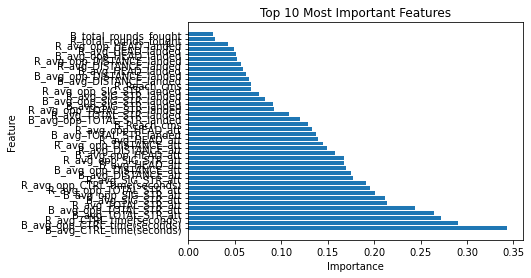

In [25]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("data.csv/data.csv")
not_include_list = ["Referee","date","location","R_fighter","B_fighter","R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_Weight_lbs","B_Weight_lbs"]
processed_df = df.drop(columns=not_include_list)
X = processed_df.drop(columns=["Winner"])
X = X.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
string_cols = X.select_dtypes(['object']).columns

# one-hot encode all string columns
new_df = pd.get_dummies(X, columns=string_cols, drop_first=True)

X = new_df

y = df["Winner"]
# select all boolean columns
bool_cols = new_df.select_dtypes(['bool']).columns

# convert boolean values to 0/1
new_df[bool_cols] = new_df[bool_cols].astype(int)

from sklearn.preprocessing import LabelEncoder

# assume 'df' is your dataframe and 'column_name' is the column you want to label encode
le = LabelEncoder()

y = le.fit_transform(y)

nan_cols = X.columns[X.isna().any()].tolist()

for col in nan_cols:
    X[f'is_nan_{col}'] = X[col].isna().astype(int)
    X[col] = X[col].fillna(0)

from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)  # retain 95% of the variance

# Fit the PCA object to the data and transform it
X_pca = pca.fit_transform(X)

# Get the most important columns (features)
importance = pca.components_[0]

# Get the feature names
feature_names = X.columns

# Sort the feature names by importance
sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for feature, importance in sorted_features[:40]:
    print(f"{feature}: {importance:.4f}")


import matplotlib.pyplot as plt

# Get the top 10 most important features
# sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Extract the feature names and importance values
feature_names = [x[0] for x in sorted_features[:40]]
importance_values = [x[1] for x in sorted_features[:40]]

# Create a bar graph
plt.barh(range(len(feature_names)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [26]:
X = X[feature_names]

In [89]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [92]:
model.fit(X_train,y_train)

c:\Users\adipk\myapps\software\envs\alphazero\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [93]:
model.score(X_test,y_test)

0.683291770573566

In [94]:
model.coef_

array([[ 2.01041937e-03,  1.48549061e-03, -1.88350075e-03,
         1.23777298e-04,  1.10748953e-02,  1.26440840e-02,
         2.58043175e-03, -1.00541150e-02,  2.45247810e-03,
        -1.89708686e-04, -5.20100754e-03,  2.56773029e-04,
         6.02577346e-03,  1.49094420e-03, -5.52614467e-03,
        -7.64621184e-03, -5.00070466e-04,  3.79994817e-03,
        -6.77311014e-03, -9.56630920e-03, -1.40141677e-03,
         7.62849586e-03, -1.12279393e-02, -4.25030784e-03,
        -2.08469224e-03,  4.45404825e-03, -3.49857487e-03,
         3.92467571e-03,  1.23498745e-02, -4.29294218e-03,
        -1.50646674e-03, -3.06308442e-03,  8.30745428e-03,
        -1.80367219e-02, -4.81317662e-03,  1.49110001e-02,
         1.19480066e-02,  9.01542050e-03,  1.97020694e-03,
        -1.32908511e-02],
       [-2.01074775e-03, -1.01449191e-03,  3.28155790e-03,
         5.80222035e-04, -7.23993349e-03, -9.97935340e-03,
        -2.10064911e-03,  2.67936894e-03, -6.70799666e-03,
         1.82939017e-03,  2.45

In [110]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier

In [141]:
clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [142]:
clf.score(X_test,y_test)

0.6683291770573566

In [143]:
clf.score(X_train,y_train)

0.660428363485132

In [144]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

[Text(0.5, 0.8333333333333334, 'B_Reach_cms <= 73.66\ngini = 0.46\nsamples = 4809\nvalue = [1550, 84, 3175]\nclass = Red'),
 Text(0.25, 0.5, 'R_avg_DISTANCE_att <= 232.5\ngini = 0.081\nsamples = 715\nvalue = [15, 15, 685]\nclass = Red'),
 Text(0.125, 0.16666666666666666, 'gini = 0.079\nsamples = 714\nvalue = [14, 15, 685]\nclass = Red'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Blue'),
 Text(0.75, 0.5, 'R_avg_opp_HEAD_landed <= 11.571\ngini = 0.489\nsamples = 4094\nvalue = [1535, 69, 2490]\nclass = Red'),
 Text(0.625, 0.16666666666666666, 'gini = 0.438\nsamples = 1479\nvalue = [442, 20, 1017]\nclass = Red'),
 Text(0.875, 0.16666666666666666, 'gini = 0.508\nsamples = 2615\nvalue = [1093, 49, 1473]\nclass = Red')]

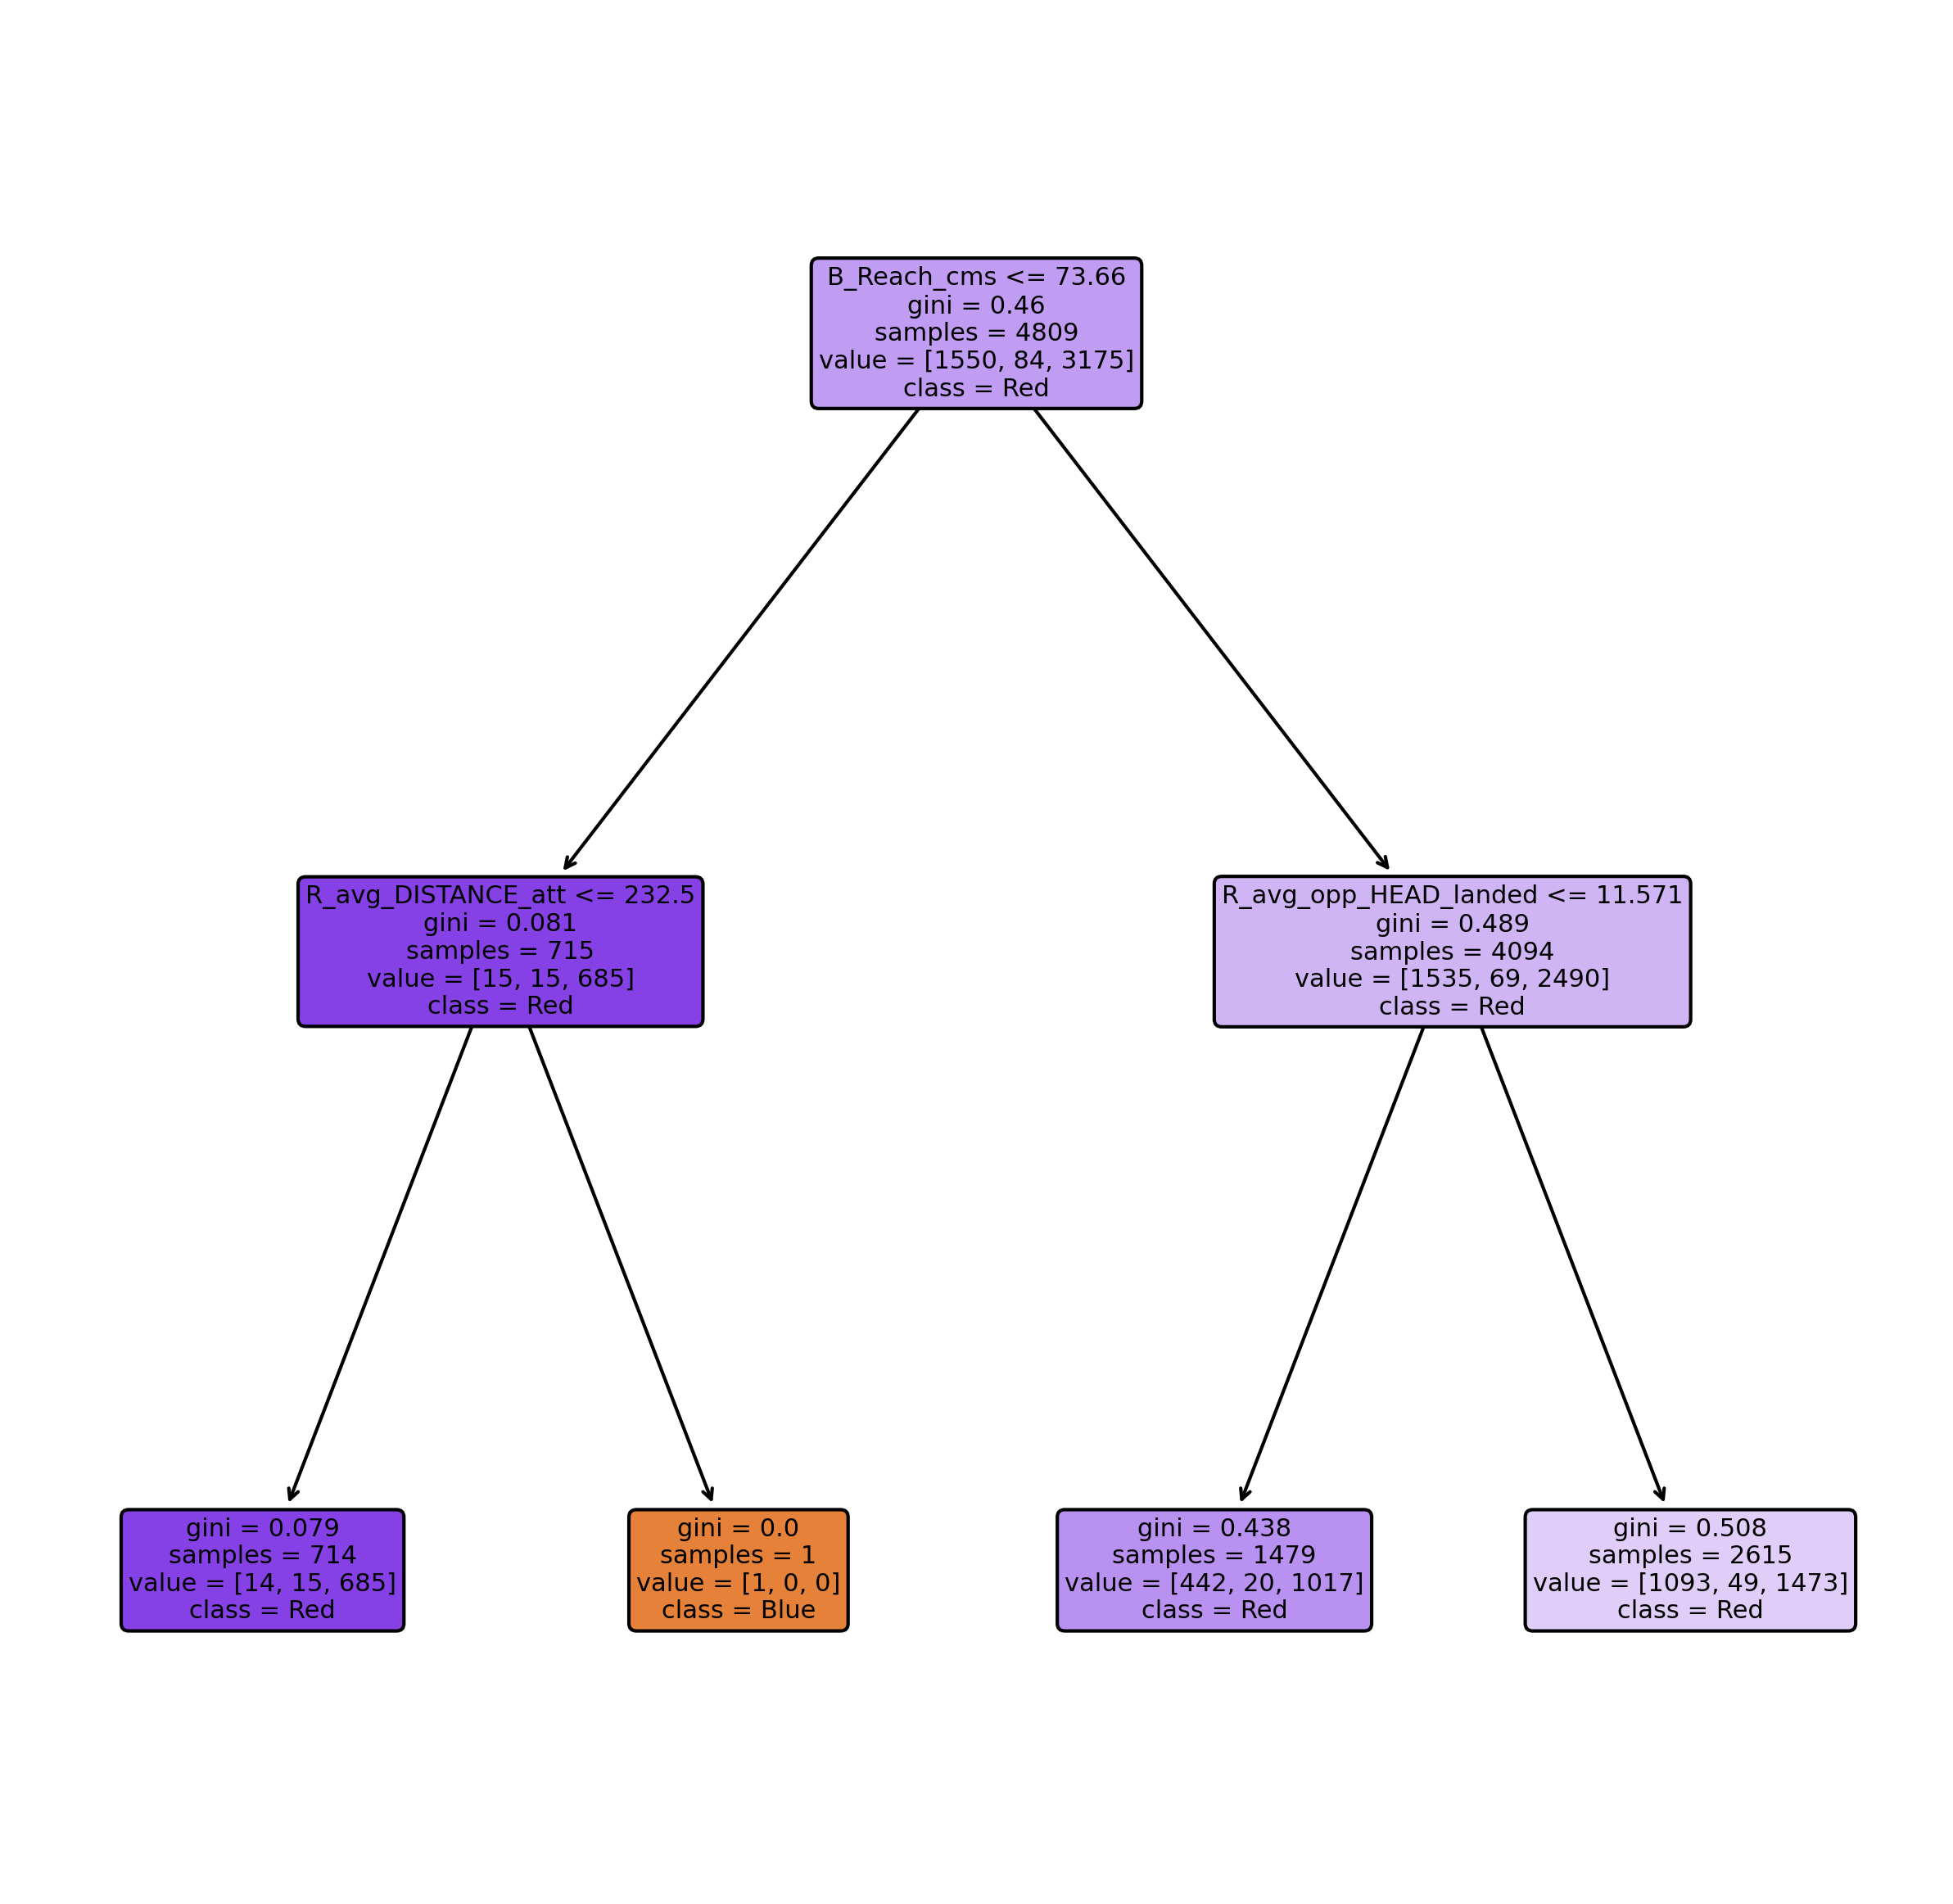

In [145]:
plt.figure(figsize=(10, 10), dpi=300)
# plot_tree(clf, filled=True, rounded=True, feature_names=X.columns.tolist())
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns.tolist(),
          class_names=['Blue', 'Draw','Red'], # add class names
           label='all') 

In [65]:
clf = RandomForestClassifier(n_estimators=500,max_depth=9).fit(X_train, y_train)

In [66]:
clf.score(X_test,y_test)

0.6882793017456359

In [67]:
clf.score(X_train,y_train)

0.8080682054481181

In [68]:
from sklearn import svm
clf = svm.SVC()

In [69]:
clf.fit(X_train,y_train)

SVC()

In [70]:
clf.score(X_test,y_test)

0.6807980049875312

In [71]:
clf.score(X_train,y_train)

0.6756082345601996

In [72]:
from sklearn.neural_network import MLPClassifier

In [85]:
clf = MLPClassifier(alpha=1e-4,
hidden_layer_sizes=(10, 10))

In [86]:
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10))

In [87]:
clf.score(X_test,y_test)

0.685785536159601

In [88]:
clf.score(X_train,y_train)

0.6826783114992722